# Theme : Infrastructure Deficit- addressing this deficit: AI's Transformative Role in Planning
***Project title : Towards Smarter Healthcare Infrastructure: The AI Perspective***


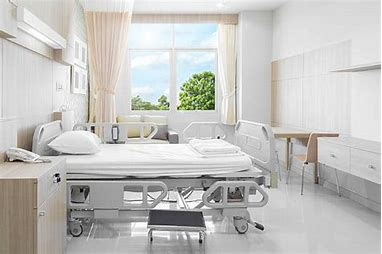

**Introduction**

*The Importance of Infrastructure in the development of a country cannot be over-emphasized. Infrastructure refers to the physical systems of a region or nation that contributes to its development . This includes good roads, healthcare facilities, Educational facilities and so on. This project focuses on the healthcare Infrastructure*
*The IDB Invest forum (a member of the Inter-American development bank group )reported that:*  
“*One of the most basic problems in the health system is that the physical infrastructure is ageing and poorly maintained. The IDB estimates the need for investment in this area at around $100 billion—both to replace old hospitals, clinics and medical equipment and to upgrade infrastructure to meet today’s energy efficiency standards*”  

**Project Goal**

*Analyse the data to identify patterns in the distribution of healthcare facilities and anticipate (predict) potential future changes, such as growth or decline. The objective is to facilitate informed decision-making when it comes to healthcare infrastructure development*.

**About the Dataset**

*The dataset was gotten from kaggle and it was provided by the World Health Organisation (W.H.O.) for research and educational purposes. It contains 283 rows and 8 columns listed as thus* :

- *Country : Name of the country*
- *Year : Year which the data was recorded, which is 2010 and 2014*
- *Total Density per 100,000 population: Health posts :  number of  health environments with very limited number of beds per 100,000 persons in the country*
- *Total Density per 100,000 population: Health centers : number of health centers per 100,000 persons in the country*
- *Total Density per 100,000 population: District/rural hospitals :  number of district/rural per 100,000 persons in the country*
- *Total Density per 100,000 population: Provincial Hospitals :  number of provincial hospitals  per 100,000 persons in the country*
- *Total Density per 100,000 population: Specilized hospitals :  number of specialised hospitals  per 100,000 persons in the country*
- *Total Density per 100,000 population: Hospitals :  number of hospitals  per 100,000 persons in the country*  


In [1]:
# install dependencies

# the library classifies countries into their various continents

# ! pip install pycountry-convert

In [2]:
# Import the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Loading the data
df = pd.read_csv('dataset/WHO_Infrastructure.csv')

# displaying the first 5 rows
df.head()

,Country,Year,Total density per 100 000 population: Health posts,Total density per 100 000 population: Health centres,Total density per 100 000 population: District/rural hospitals,Total density per 100 000 population: Provincial hospitals,Total density per 100 000 population: Specialized hospitals,Total density per 100 000 population: Hospitals
0,Afghanistan,2013,2.95,1.22,0.18,0.10,0.09,0.37
1,Afghanistan,2010,2.87,1.19,0.18,0.10,0.08,NaN
2,Albania,2013,13.08,NaN,0.72,0.35,0.28,1.36
3,Albania,2010,12.95,NaN,0.72,0.34,0.28,NaN
4,Angola,2010,NaN,NaN,NaN,0.00,0.00,NaN


In [4]:
# create a copy of the original dataset
data = df.copy()

In [5]:
# check the shape of the data
df.shape

(283, 8)

In [6]:
# check the data types
df.dtypes

Country                                                            object
Year                                                                int64
Total density per 100 000 population: Health posts                float64
Total density per 100 000 population: Health centres              float64
Total density per 100 000 population: District/rural hospitals    float64
Total density per 100 000 population: Provincial hospitals        float64
Total density per 100 000 population: Specialized hospitals       float64
Total density per 100 000 population: Hospitals                   float64
dtype: object

In [7]:
# Year is not in the right format, let's change it to datetime

import datetime
df['Year'] = pd.to_datetime(df['Year'],format = '%Y')

In [8]:
# status check

df.dtypes

Country                                                                   object
Year                                                              datetime64[ns]
Total density per 100 000 population: Health posts                       float64
Total density per 100 000 population: Health centres                     float64
Total density per 100 000 population: District/rural hospitals           float64
Total density per 100 000 population: Provincial hospitals               float64
Total density per 100 000 population: Specialized hospitals              float64
Total density per 100 000 population: Hospitals                          float64
dtype: object

In [9]:
# Extracting only the year from this new date

df['Year1'] = df['Year'].dt.year
df.head()

,Country,Year,Total density per 100 000 population: Health posts,Total density per 100 000 population: Health centres,Total density per 100 000 population: District/rural hospitals,Total density per 100 000 population: Provincial hospitals,Total density per 100 000 population: Specialized hospitals,Total density per 100 000 population: Hospitals,Year1
0,Afghanistan,2013-01-01,2.95,1.22,0.18,0.10,0.09,0.37,2013
1,Afghanistan,2010-01-01,2.87,1.19,0.18,0.10,0.08,NaN,2010
2,Albania,2013-01-01,13.08,NaN,0.72,0.35,0.28,1.36,2013
3,Albania,2010-01-01,12.95,NaN,0.72,0.34,0.28,NaN,2010
4,Angola,2010-01-01,NaN,NaN,NaN,0.00,0.00,NaN,2010


In [10]:
# remove the original year column
df = df.drop(columns = ['Year'])

In [11]:
# rename the new year column (i.e year1-year)

df = df.rename(columns= {'Year1':'Year'})
df.head()

,Country,Total density per 100 000 population: Health posts,Total density per 100 000 population: Health centres,Total density per 100 000 population: District/rural hospitals,Total density per 100 000 population: Provincial hospitals,Total density per 100 000 population: Specialized hospitals,Total density per 100 000 population: Hospitals,Year
0,Afghanistan,2.95,1.22,0.18,0.10,0.09,0.37,2013
1,Afghanistan,2.87,1.19,0.18,0.10,0.08,NaN,2010
2,Albania,13.08,NaN,0.72,0.35,0.28,1.36,2013
3,Albania,12.95,NaN,0.72,0.34,0.28,NaN,2010
4,Angola,NaN,NaN,NaN,0.00,0.00,NaN,2010


In [12]:
# status check
df.dtypes

Country                                                            object
Total density per 100 000 population: Health posts                float64
Total density per 100 000 population: Health centres              float64
Total density per 100 000 population: District/rural hospitals    float64
Total density per 100 000 population: Provincial hospitals        float64
Total density per 100 000 population: Specialized hospitals       float64
Total density per 100 000 population: Hospitals                   float64
Year                                                                int64
dtype: object

In [13]:
# check for null values
df.isna().sum()

Country                                                             0
Total density per 100 000 population: Health posts                 61
Total density per 100 000 population: Health centres               64
Total density per 100 000 population: District/rural hospitals     39
Total density per 100 000 population: Provincial hospitals         32
Total density per 100 000 population: Specialized hospitals        31
Total density per 100 000 population: Hospitals                   146
Year                                                                0
dtype: int64

In [14]:
# check for duplicates
df.duplicated().sum()

0

In [15]:
# Handling missing values (fill with mean of columns )

for column in df.columns:
    if df[column].isnull().any():  # Check if the column has missing values
        df[column].fillna(df[column].mean(), inplace=True)

In [16]:
# status check
df.isna().sum()

Country                                                           0
Total density per 100 000 population: Health posts                0
Total density per 100 000 population: Health centres              0
Total density per 100 000 population: District/rural hospitals    0
Total density per 100 000 population: Provincial hospitals        0
Total density per 100 000 population: Specialized hospitals       0
Total density per 100 000 population: Hospitals                   0
Year                                                              0
dtype: int64

In [17]:
# checking column names or keys
df.keys()

Index(['Country', 'Total density per 100 000 population: Health posts',
       'Total density per 100 000 population: Health centres',
       'Total density per 100 000 population: District/rural hospitals',
       'Total density per 100 000 population: Provincial hospitals',
       'Total density per 100 000 population: Specialized hospitals',
       'Total density per 100 000 population: Hospitals', 'Year'],
      dtype='object')

In [18]:
# Since we already know the densities are per 100,000 persons , Let's rename the columns
df = df.rename(columns = {'Total density per 100 000 population: Health posts': 'Health posts','Total density per 100 000 population: Health centres':
'Health centers','Total density per 100 000 population: District/rural hospitals': 'Rural/District hospitals',
'Total density per 100 000 population: Provincial hospitals': 'Provincial hospitals','Total density per 100 000 population: Specialized hospitals':
'Specialized Hospitals','Total density per 100 000 population: Hospitals': 'Hospitals'})


In [19]:
# status check
df.keys()

Index(['Country', 'Health posts', 'Health centers', 'Rural/District hospitals',
       'Provincial hospitals', 'Specialized Hospitals', 'Hospitals', 'Year'],
      dtype='object')

In [20]:
# Let's explore total density of healthcare facilities per country
Total_hf = ['Health posts', 'Hospitals', 'Health centers', 'Rural/District hospitals', 'Provincial hospitals', 'Specialized Hospitals']

df['Total_hf_densities'] = df[Total_hf].sum(axis=1)

# Total_hf_densities sums up the density of the healthcare facilities by country

In [21]:
# import library would allow us place countries in their various continents
import pycountry_convert as pc

def get_continent(country):
    try:
        country_code = pc.country_name_to_country_alpha2(country, cn_name_format="default")
        continent_code = pc.country_alpha2_to_continent_code(country_code)
        continent_name = pc.convert_continent_code_to_continent_name(continent_code)
        return continent_name
    except:
        return np.nan
df['Region'] = df['Country'].apply(get_continent)
df.head()

,Country,Health posts,Health centers,Rural/District hospitals,Provincial hospitals,Specialized Hospitals,Hospitals,Year,Total_hf_densities,Region
0,Afghanistan,2.950000,1.220000,0.180000,0.10,0.09,0.370000,2013,4.910000,Asia
1,Afghanistan,2.870000,1.190000,0.180000,0.10,0.08,2.235401,2010,6.655401,Asia
2,Albania,13.080000,7.032648,0.720000,0.35,0.28,1.360000,2013,22.822648,Europe
3,Albania,12.950000,7.032648,0.720000,0.34,0.28,2.235401,2010,23.558050,Europe
4,Angola,22.120991,7.032648,1.188238,0.00,0.00,2.235401,2010,32.577279,Africa


In [22]:
# The data above will not be sufficient to derive insights, hence more data will be added.

In [23]:
countries_df = pd.read_csv("dataset/Countries_World_Bank_Data.csv")
countries_df.head()

,Country Name,Country Code,Year,Agriculture (% GDP),Ease of Doing Business,Education Expenditure (% GDP),Export (% GDP),GDP,Health Expenditure (% GDP),Import (% GDP),...,Population,Land,Continent Name,Export,Import,Education Expenditure,Health Expenditure,Net Trade,GDP Per Capita,Population Density
0,Afghanistan,AFG,2000,27.501127,40.717968,13.670101,NaN,1.415197e+10,10.902580,NaN,...,19542982.0,652860.0,Asia,NaN,NaN,1.934589e+09,1.542930e+09,NaN,724.145910,29.934415
1,Afghanistan,AFG,2001,27.501127,40.717968,13.670101,NaN,1.415197e+10,10.902580,NaN,...,19688632.0,652860.0,Asia,NaN,NaN,1.934589e+09,1.542930e+09,NaN,718.788917,30.157510
2,Afghanistan,AFG,2002,38.627892,40.717968,13.670101,NaN,3.854235e+09,9.443391,NaN,...,21000256.0,652860.0,Asia,NaN,NaN,5.268779e+08,3.639705e+08,NaN,183.532775,32.166553
3,Afghanistan,AFG,2003,37.418855,40.717968,13.670101,NaN,4.539497e+09,8.941258,NaN,...,22645130.0,652860.0,Asia,NaN,NaN,6.205538e+08,4.058881e+08,NaN,200.462376,34.686043
4,Afghanistan,AFG,2004,29.721067,40.717968,13.670101,NaN,5.220825e+09,9.808474,NaN,...,23553551.0,652860.0,Asia,NaN,NaN,7.136921e+08,5.120832e+08,NaN,221.657662,36.077491


In [24]:
countries_df.isnull().sum()

Country Name                        0
Country Code                        0
Year                                0
Agriculture (% GDP)               276
Ease of Doing Business            598
Education Expenditure (% GDP)     368
Export (% GDP)                    460
GDP                                69
Health Expenditure (% GDP)        575
Import (% GDP)                    460
Industry (% GDP)                  253
Inflation Rate                    552
R&D                              1518
Service (% GDP)                   299
Unemployment                      667
Population                          0
Land                                0
Continent Name                      0
Export                            460
Import                            460
Education Expenditure             414
Health Expenditure                575
Net Trade                         460
GDP Per Capita                     69
Population Density                  0
dtype: int64

In [25]:
countries_df.dtypes

Country Name                      object
Country Code                      object
Year                               int64
Agriculture (% GDP)              float64
Ease of Doing Business           float64
Education Expenditure (% GDP)    float64
Export (% GDP)                   float64
GDP                              float64
Health Expenditure (% GDP)       float64
Import (% GDP)                   float64
Industry (% GDP)                 float64
Inflation Rate                   float64
R&D                              float64
Service (% GDP)                  float64
Unemployment                     float64
Population                       float64
Land                             float64
Continent Name                    object
Export                           float64
Import                           float64
Education Expenditure            float64
Health Expenditure               float64
Net Trade                        float64
GDP Per Capita                   float64
Population Densi

In [26]:
countries_df.shape

(5106, 25)

In [27]:
# The following features will be dropped as they do not relate to te task
countries_df.drop(["Country Code", "Agriculture (% GDP)", "Ease of Doing Business", "Education Expenditure (% GDP)",
                  "Export (% GDP)", "Health Expenditure (% GDP)", "Import (% GDP)", "Industry (% GDP)", "Inflation Rate", "R&D", "Service (% GDP)",
                  "Unemployment", "Land", "Continent Name", "Export", "Import", "Education Expenditure", "Net Trade"], axis=1, inplace=True)

countries_df.head()

,Country Name,Year,GDP,Population,Health Expenditure,GDP Per Capita,Population Density
0,Afghanistan,2000,1.415197e+10,19542982.0,1.542930e+09,724.145910,29.934415
1,Afghanistan,2001,1.415197e+10,19688632.0,1.542930e+09,718.788917,30.157510
2,Afghanistan,2002,3.854235e+09,21000256.0,3.639705e+08,183.532775,32.166553
3,Afghanistan,2003,4.539497e+09,22645130.0,4.058881e+08,200.462376,34.686043
4,Afghanistan,2004,5.220825e+09,23553551.0,5.120832e+08,221.657662,36.077491


In [28]:
countries_df.dtypes

Country Name           object
Year                    int64
GDP                   float64
Population            float64
Health Expenditure    float64
GDP Per Capita        float64
Population Density    float64
dtype: object

In [29]:
countries_df.isnull().sum()

Country Name            0
Year                    0
GDP                    69
Population              0
Health Expenditure    575
GDP Per Capita         69
Population Density      0
dtype: int64

In [30]:
# Missing values are duly handled
columns_to_fill = ['GDP', 'Health Expenditure', 'GDP Per Capita']

countries_df[columns_to_fill] = countries_df[columns_to_fill].fillna(countries_df[columns_to_fill].mean())
countries_df.isnull().sum()

Country Name          0
Year                  0
GDP                   0
Population            0
Health Expenditure    0
GDP Per Capita        0
Population Density    0
dtype: int64

In [31]:
# Column is renamed to avoid merging errors

countries_df.rename(columns={'Country Name': 'Country'}, inplace=True)
countries_df.head()

,Country,Year,GDP,Population,Health Expenditure,GDP Per Capita,Population Density
0,Afghanistan,2000,1.415197e+10,19542982.0,1.542930e+09,724.145910,29.934415
1,Afghanistan,2001,1.415197e+10,19688632.0,1.542930e+09,718.788917,30.157510
2,Afghanistan,2002,3.854235e+09,21000256.0,3.639705e+08,183.532775,32.166553
3,Afghanistan,2003,4.539497e+09,22645130.0,4.058881e+08,200.462376,34.686043
4,Afghanistan,2004,5.220825e+09,23553551.0,5.120832e+08,221.657662,36.077491


In [32]:
# Datatypes for Country and Year in both dataframes are of same type (object and int64 respectively)
# so there is no need for conversion before merging.

health_df = df.copy()
if 'Country' in df.columns and 'Country' in countries_df.columns:
    health_df = df.copy()
    health_df = pd.merge(health_df, countries_df, on=['Country', 'Year'], how='inner')
    health_df.head()
else:
    print("Column 'Country' not found in one or both DataFrames.")

health_df.head()

,Country,Health posts,Health centers,Rural/District hospitals,Provincial hospitals,Specialized Hospitals,Hospitals,Year,Total_hf_densities,Region,GDP,Population,Health Expenditure,GDP Per Capita,Population Density
0,Afghanistan,2.950000,1.220000,0.180000,0.10,0.09,0.370000,2013,4.910000,Asia,2.056449e+10,31541209.0,1.810901e+09,651.987862,48.312363
1,Afghanistan,2.870000,1.190000,0.180000,0.10,0.08,2.235401,2010,6.655401,Asia,1.563384e+10,28189672.0,1.339769e+09,554.594735,43.178740
2,Albania,13.080000,7.032648,0.720000,0.35,0.28,1.360000,2013,22.822648,Europe,1.277622e+10,2895092.0,8.013688e+08,4413.063397,100.698852
3,Albania,12.950000,7.032648,0.720000,0.34,0.28,2.235401,2010,23.558050,Europe,1.192693e+10,2913021.0,7.441204e+08,4094.349699,101.322470
4,Angola,22.120991,7.032648,1.188238,0.00,0.00,2.235401,2010,32.577279,Africa,8.169953e+10,23364185.0,2.201884e+09,3496.784796,18.740824


In [33]:
health_df.shape

(257, 15)

In [34]:
df = health_df.copy()

In [35]:
# store clean data
df.to_csv('dataset/cleaned_WHO_Infrastructure.csv', index=False)


Summary Statistics

In [36]:
df.describe()

,Health posts,Health centers,Rural/District hospitals,Provincial hospitals,Specialized Hospitals,Hospitals,Year,Total_hf_densities,GDP,Population,Health Expenditure,GDP Per Capita,Population Density
count,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,2.570000e+02,2.570000e+02,2.570000e+02,257.000000,257.000000
mean,21.992671,6.635832,1.173857,0.888754,1.495858,2.273050,2011.486381,34.460023,1.586182e+11,2.337200e+07,1.028143e+10,11838.734291,200.702355
std,34.835357,15.680199,2.544778,1.626669,14.112772,3.681671,1.508054,43.559597,4.991976e+11,9.000077e+07,3.198425e+10,21373.614800,667.444565
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2010.000000,2.080000,3.876097e+07,1.024100e+04,5.695352e+06,222.660583,1.727821
25%,6.540000,0.700000,0.300000,0.110000,0.060000,1.250000,2010.000000,12.225401,6.555591e+09,1.331475e+06,3.122875e+08,1559.139050,32.472908
50%,14.510000,3.560000,0.640000,0.420000,0.150000,2.235401,2010.000000,26.134630,1.909102e+10,6.119379e+06,1.317424e+09,4702.915770,79.657365
75%,22.120991,7.032648,1.190000,0.806892,0.540000,2.235401,2013.000000,36.472648,7.416055e+10,1.664754e+07,4.051188e+09,12512.594127,138.157599
max,278.040000,144.660000,28.840000,11.300000,222.070000,56.450000,2014.000000,289.501926,6.087192e+12,1.337705e+09,2.575298e+11,185055.487412,7530.211994


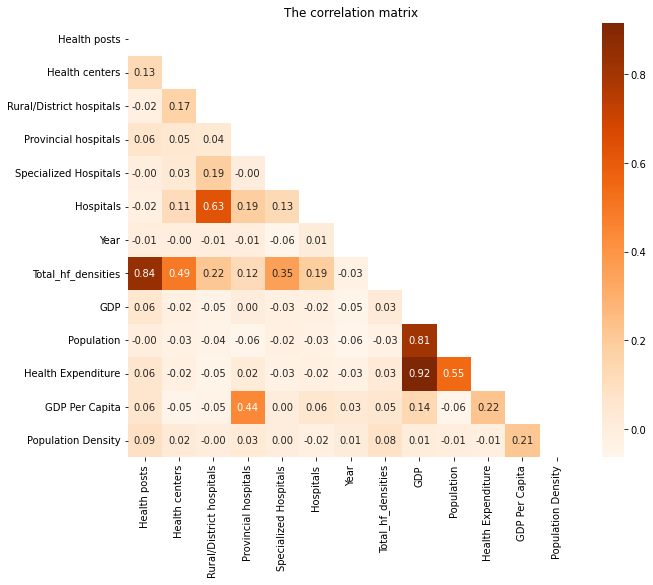

In [37]:
# Let's take a look at the correlation between the numerical values
corrmat = df.corr()
top_corr_features = corrmat.index
mask= np.triu(top_corr_features)
plt.figure(figsize=(10,8))
#plot heat map
plt.title ('The correlation matrix')
sns.heatmap(df[top_corr_features].corr(),annot=True, fmt='.2f', mask=mask, cmap='Oranges');

The heatmap above shows that the variable **GDP Per Capita** is strongly correlated with the variables: **Health Expenditure** and **Total_hf_densities**. 
*Rural/District hospitals have some correlation with hospitals*

This means that countries with higher GDP per capita tend to also have higher health expenditures and more healthcare facilities.
The heatmap also shows that the variable **Population Density** is negatively correlated with the variable **Total_hf_densities**. 
This means that countries with higher population densities tend to have fewer healthcare facilities per capita.


# Data Exploration

In [38]:
# Total number of countries
df['Country'].nunique()

125

In [39]:
df.tail()

,Country,Health posts,Health centers,Rural/District hospitals,Provincial hospitals,Specialized Hospitals,Hospitals,Year,Total_hf_densities,Region,GDP,Population,Health Expenditure,GDP Per Capita,Population Density
252,Vanuatu,125.18,16.27,1.67,0.42,0.42,2.235401,2010,146.195401,Oceania,6.707130e+08,245453.0,2.365310e+07,2732.551557,20.135603
253,Zambia,1.18,8.33,0.30,0.12,0.03,0.450000,2013,10.410000,Africa,2.803724e+10,15234976.0,1.315202e+09,1840.320553,20.242856
254,Zambia,1.31,9.25,0.33,0.14,0.04,2.235401,2010,13.305401,Africa,2.026556e+10,13792086.0,7.537361e+08,1469.361450,18.325675
255,Zimbabwe,0.00,9.41,0.37,0.08,0.08,0.520000,2013,10.460000,Africa,1.909102e+10,13555422.0,1.357258e+09,1408.367810,34.689891
256,Zimbabwe,0.00,10.59,0.41,0.09,0.09,2.235401,2010,13.415401,Africa,1.204166e+10,12839771.0,1.261464e+09,937.840340,32.858458


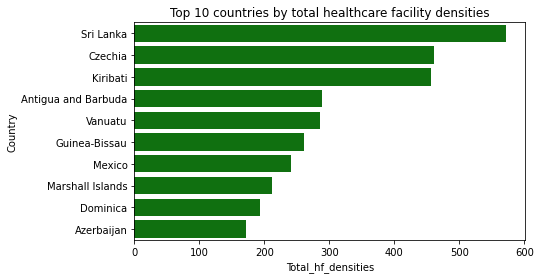

In [40]:
# Total densities by country

df1 = df.groupby('Country')['Total_hf_densities'].sum().reset_index()
df1_sort = df1.sort_values(by = 'Total_hf_densities',ascending = False)
top_10 = df1_sort.head(10)

plt.figure(figsize = (7,4))
sns.barplot(data = top_10, x = 'Total_hf_densities',y = 'Country',color = 'Green')
plt.title ('Top 10 countries by total healthcare facility densities')
plt.show()

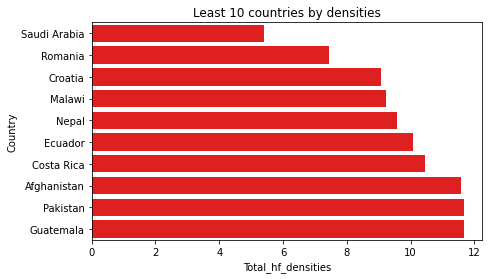

In [41]:
# Least 10 countries by total densities
df1_sort2 = df1.sort_values(by = 'Total_hf_densities',ascending = True)
least_10 = df1_sort2.head(10)


plt.figure(figsize = (7,4))
sns.barplot(data = least_10, x = 'Total_hf_densities',y = 'Country',color = 'Red')
plt.title ('Least 10 countries by densities')
plt.show()

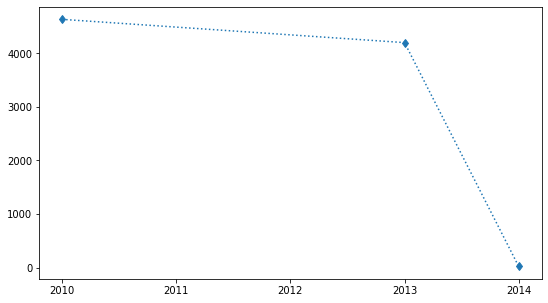

In [42]:
# Distribution of healthcare facilities over the years
df2 = df.groupby('Year')['Total_hf_densities'].sum().reset_index()

plt.figure (figsize = (9,5))
plt.plot(df2['Year'],df2['Total_hf_densities'],linestyle = ':', marker = 'd')
plt.locator_params(axis='x', integer=True)
plt.show()

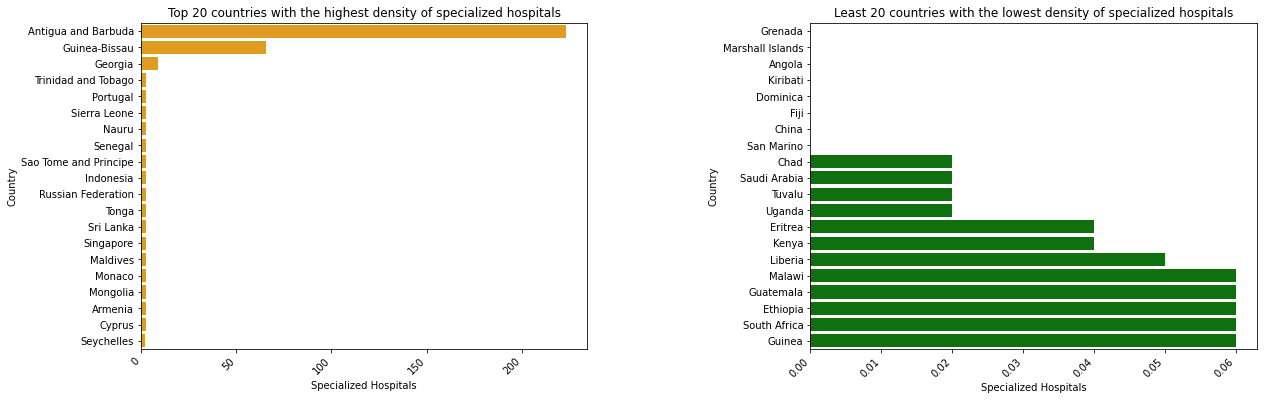

In [43]:
# Top 5  countries by  density of specialized hospitals

df3 = df.groupby('Country')['Specialized Hospitals'].sum().reset_index()
df3_sort1 = df3.sort_values(by = 'Specialized Hospitals',ascending = False)
top20_countries = df3_sort1.head(20)
top20_countries


df3_sort2 = df3.sort_values(by = 'Specialized Hospitals',ascending = True)
least20_countries = df3_sort2.head(20)
least20_countries

plt.figure(figsize =(20,6))
plt.subplot(1,2,1)
sns.barplot(data = top20_countries, x = 'Specialized Hospitals', y = 'Country',color = 'Orange')
plt.title('Top 20 countries with the highest density of specialized hospitals')
plt.subplots_adjust(wspace = 0.5 , hspace = 0.5)
plt.xticks(rotation=45, ha='right')


plt.subplot(1,2,2)
sns.barplot(data = least20_countries, x = 'Specialized Hospitals', y = 'Country',color = 'green')
plt.title('Least 20 countries with the lowest density of specialized hospitals')
plt.subplots_adjust(wspace = 0.5 , hspace = 0.5)
plt.xticks(rotation=45, ha='right')
plt.show()

In [44]:
# Let's explore the least 5 countries too
df3_sort2 = df3.sort_values(by = 'Specialized Hospitals',ascending = True)
least5_countries = df3_sort2.head(5)
least5_countries

# Least 5 countries have no values, let's explore the least 10
least10_countries = df3_sort2.head(10)
least10_countries

# least 15
least20_countries = df3_sort2.head(20)
least20_countries


,Country,Specialized Hospitals
44,Grenada,0.00
74,Marshall Islands,0.00
2,Angola,0.00
61,Kiribati,0.00
32,Dominica,0.00
39,Fiji,0.00
24,China,0.00
99,San Marino,0.00
22,Chad,0.02
101,Saudi Arabia,0.02


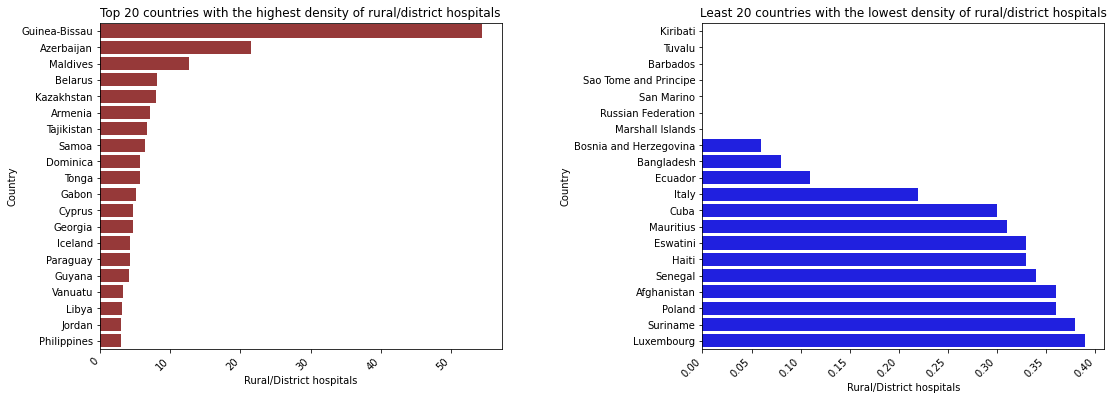

In [45]:
# Top 20 countries with the highest density of district/rural hospitals

df4 = df.groupby('Country')['Rural/District hospitals'].sum().reset_index()
df4_sort1 = df4.sort_values(by = 'Rural/District hospitals',ascending = False)
top20_countries1 = df4_sort1.head(20)
top20_countries1

df4_sort2 = df4.sort_values(by = 'Rural/District hospitals',ascending = True)
least20_countries1 = df4_sort2.head(20)
least20_countries1



plt.figure(figsize =(18,6))

plt.subplot(1,2,1)
sns.barplot(data = top20_countries1, x = 'Rural/District hospitals', y = 'Country',color = 'brown')
plt.title('Top 20 countries with the highest density of rural/district hospitals')
plt.subplots_adjust(hspace = 0.5, wspace=0.5)
plt.xticks(rotation=45, ha='right')

plt.subplot(1,2,2)
sns.barplot(data = least20_countries1, x = 'Rural/District hospitals', y = 'Country',color = 'blue')
plt.title('Least 20 countries with the lowest density of rural/district hospitals')
plt.subplots_adjust(hspace = 0.5, wspace=0.5)
plt.xticks(rotation=45, ha='right')
plt.show()


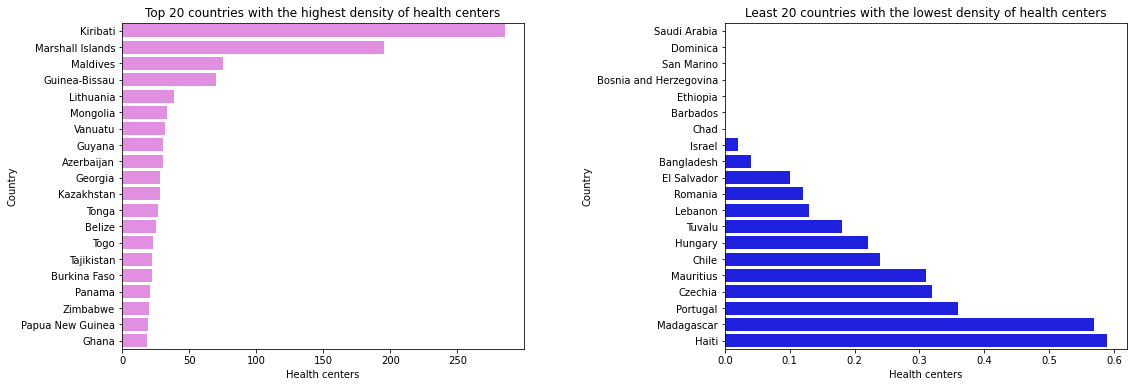

In [46]:
# Top 5 countries with the highest density of health centers
df5 = df.groupby('Country')['Health centers'].sum().reset_index()
df5_sort1 = df5.sort_values(by = 'Health centers',ascending = False)
top20_countries2 = df5_sort1.head(20)

df5_sort2 = df5.sort_values(by = 'Health centers',ascending = True)
least20_countries2 = df5_sort2.head(20)


plt.figure(figsize =(18,6))
plt.subplot(1,2,1)
sns.barplot(data = top20_countries2, x = 'Health centers', y = 'Country',color = 'violet')
plt.subplots_adjust(hspace = 0.5, wspace=0.5)
plt.title('Top 20 countries with the highest density of health centers')

plt.subplot(1,2,2)
sns.barplot(data = least20_countries2, x = 'Health centers', y = 'Country',color = 'blue')
plt.subplots_adjust(hspace = 0.5, wspace=0.5)
plt.title('Least 20 countries with the lowest density of health centers')
plt.show()

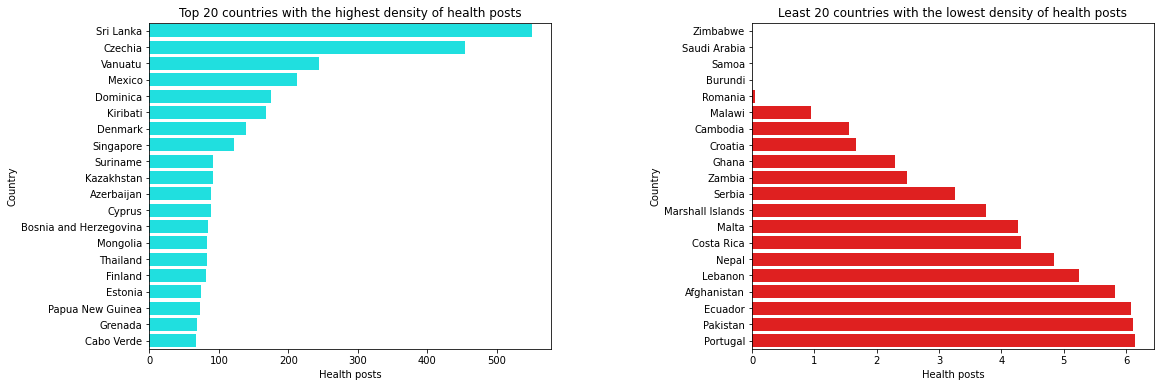

In [47]:
# Top 20 countries with the highest density of health posts
df6 = df.groupby('Country')['Health posts'].sum().reset_index()
df6_sort1 = df6.sort_values(by = 'Health posts',ascending = False)
top20_countries3 = df6_sort1.head(20)

df6_sort2 = df6.sort_values(by = 'Health posts',ascending = True)
least20_countries3 = df6_sort2.head(20)


plt.figure(figsize =(18,6))
plt.subplot(1,2,1)
sns.barplot(data = top20_countries3, x = 'Health posts', y = 'Country',color = 'cyan')
plt.subplots_adjust(hspace = 0.5, wspace=0.5)
plt.title('Top 20 countries with the highest density of health posts')

plt.subplot(1,2,2)
sns.barplot(data = least20_countries3, x = 'Health posts', y = 'Country',color = 'red')
plt.subplots_adjust(hspace = 0.5, wspace=0.5)
plt.title('Least 20 countries with the lowest density of health posts')



plt.show()


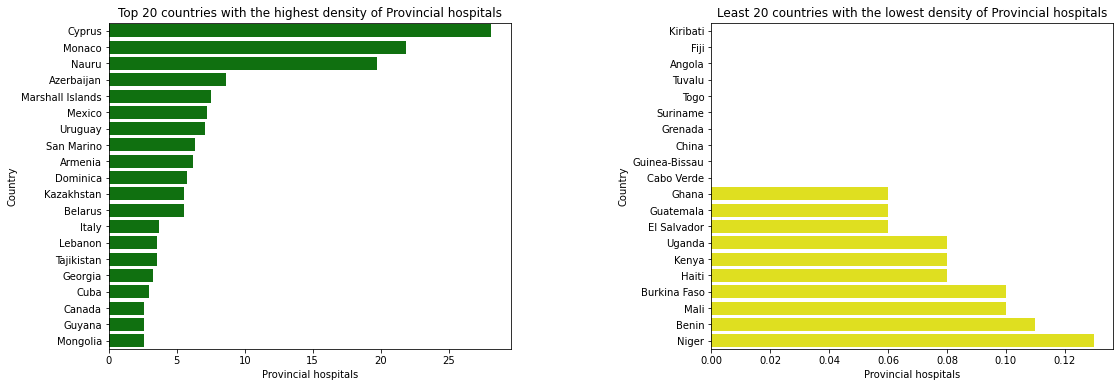

In [48]:
# Top 20 countries with the highest density of provincial hospitals
df7 = df.groupby('Country')['Provincial hospitals'].sum().reset_index()
df7_sort1 = df7.sort_values(by = 'Provincial hospitals',ascending = False)
top20_countries4 = df7_sort1.head(20)

df7_sort2= df7.sort_values(by = 'Provincial hospitals',ascending = True)
least20_countries4 = df7_sort2.head(20)

plt.figure(figsize =(18,6))
plt.subplot(1,2,1)
sns.barplot(data = top20_countries4, x = 'Provincial hospitals', y = 'Country',color = 'green')
plt.subplots_adjust(hspace = 0.5, wspace=0.5)
plt.title('Top 20 countries with the highest density of Provincial hospitals')

plt.subplot(1,2,2)
sns.barplot(data = least20_countries4, x = 'Provincial hospitals', y = 'Country',color = 'yellow')
plt.subplots_adjust(hspace = 0.5, wspace=0.5)
plt.title('Least 20 countries with the lowest density of Provincial hospitals')

plt.show()


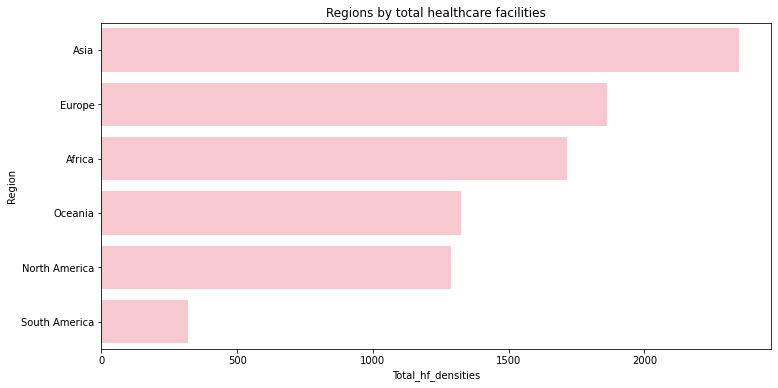

In [49]:
df8 = df.groupby('Region')['Total_hf_densities'].sum().reset_index()
df1_sort3 = df8.sort_values(by = 'Total_hf_densities',ascending = False)
df1_sort3

plt.figure(figsize=(12,6))
sns.barplot(data = df1_sort3, y = 'Region',x = 'Total_hf_densities', color = 'pink')
plt.title('Regions by total healthcare facilities')
plt.show()


# *Quick Insights*

- The data explored features for a total of 144 countries

- The top 10 countries by total healthcare facilities are : Sri Lanka, Czechia,Kiribati, Antigua and Barbuda,Vanuatu, Guinea-Bissau,Mexico,Marshall Islands, Dominica and Republic of Korea.
- The least 10 countries by total healthcare facilities are Saudi Arabia (the very least), Egypt, Romania, Croatia,Malawi, Nepal, Ecuador, Costa Rica,Afghanistan and Pakistan
Mostly Middle-east and African countries (they should be highly considered during Infrastructure planning)

- There’s been a global decrease in healthcare facilities from 2010 to 2014. There was a slight decrease from 2010 to 2013 and a significant decrease towards 2014
- The top and least 20 countries by density of each of the healthcare facilities was analysed and It was discovered that Antigua & Barbuda and Guinea-Bissau have the highest specialised hospitals while Marshall Islands and China have the least

 - Guinea-Bissau and Democratic People’s republic of Korea have the highest district or rural hospitals while Barbados and Saint Vincent of the Grenadines have the least

 - Kiribati and Marshall Islands have the highest health centres while Ethiopia and Micronesia have the least
 -  Sri Lanka and Czechia have the highest health posts while Zimbabwe and Saint Kitts & Nevis have the least
 - Monaco and Nauru have the highest Provincial hospitals while Kiribati and Fiji have the least

- The countries were categorised into their  respective regions in order  of highest healthcare facilities we have Asia, Europe, Africa, North America , Oceania and South America
